In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os

import yfinance as yf

In [69]:
# Define the stock symbol and date range
symbol = "SPY"
start_date = "1900-01-01"
end_date = "2024-01-21"

# Fetch historical stock data
df = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.840681,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.017345,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.070366,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.335377,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.441385,531500


In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-12,477.839996,478.600006,475.230011,476.679993,476.679993,57944000
2024-01-16,475.260010,476.609985,473.059998,474.929993,474.929993,85014900
2024-01-17,471.820007,472.790009,469.869995,472.290009,472.290009,68843900
2024-01-18,474.010010,477.059998,472.420013,476.489990,476.489990,91856200
2024-01-19,477.649994,482.720001,476.540009,482.429993,482.429993,110733300


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7799 entries, 1993-01-29 to 2024-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7799 non-null   float64
 1   High       7799 non-null   float64
 2   Low        7799 non-null   float64
 3   Close      7799 non-null   float64
 4   Adj Close  7799 non-null   float64
 5   Volume     7799 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 426.5 KB


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7799.000000,7799.000000,7799.000000,7799.000000,7799.000000,7.799000e+03
mean,170.954062,171.978833,169.829913,170.964693,142.613425,8.447756e+07
std,107.263652,107.838467,106.659491,107.296144,113.156673,9.226027e+07
min,43.343750,43.531250,42.812500,43.406250,24.540333,5.200000e+03
25%,105.424999,106.325001,104.531250,105.355000,70.685791,1.004505e+07
50%,132.289993,133.020004,131.220001,132.125000,93.531273,6.331770e+07
75%,210.460007,211.260002,209.600006,210.570007,181.564636,1.157804e+08
max,479.220001,482.720001,476.540009,482.429993,482.429993,8.710263e+08


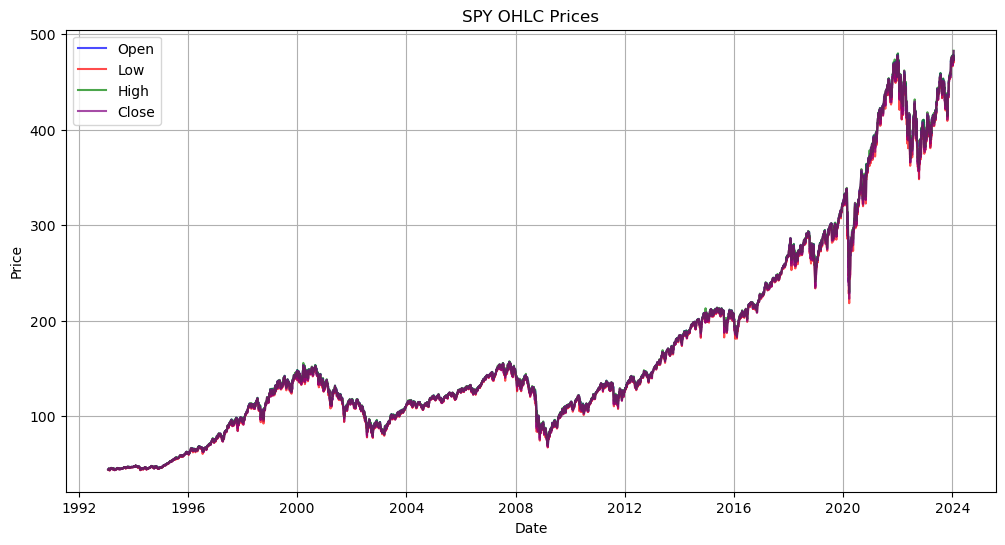

In [16]:
# Create a line chart for OHLC prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'], label='Open', color='blue', alpha=0.7)
plt.plot(df.index, df['Low'], label='Low', color='red', alpha=0.7)
plt.plot(df.index, df['High'], label='High', color='green', alpha=0.7)
plt.plot(df.index, df['Close'], label='Close', color='purple', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPY OHLC Prices')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df['Gap'] = df['Open'] - df['Close'].shift(1)

In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Gap
Date,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.840681,1003200,NaN
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.017345,480500,0.03125
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.070366,201300,-0.03125
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.335377,529400,0.06250
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.441385,531500,0.15625


In [20]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Gap          1
dtype: int64

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Gap          0
dtype: int64

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Gap
Date,,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.017345,480500,0.03125
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.070366,201300,-0.03125
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.335377,529400,0.06250
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.441385,531500,0.15625
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.423710,492100,-0.03125


In [24]:
df['Gap_Move'] = (df['Gap'] > 0).astype(int)


In [25]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Gap,Gap_Move
Date,,,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.017345,480500,0.03125,1
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.070366,201300,-0.03125,0
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.335377,529400,0.06250,1
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.441385,531500,0.15625,1
1993-02-05,44.96875,45.06250,44.71875,44.96875,25.423710,492100,-0.03125,0


In [29]:
df['Gap_Move'].value_counts(10)

1    0.545012
0    0.454988
Name: Gap_Move, dtype: float64

In [35]:
# Define bin ranges
bins = [-float('inf'), -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, float('inf')]

# Create a new column with bin labels for all moves
df['Gap_Move_Bin'] = pd.cut(df['Percentage Gap Move'], bins=bins)

# Create a table to analyze all moves
gap_moves_table = df.groupby('Gap_Move_Bin').size().reset_index(name='Frequency')

# Display the table
print("Gap Moves:")
print(gap_moves_table)


Gap Moves:
    Gap_Move_Bin  Frequency
0   (-inf, -1.0]        354
1   (-1.0, -0.9]         80
2   (-0.9, -0.8]         72
3   (-0.8, -0.7]        121
4   (-0.7, -0.6]        145
5   (-0.6, -0.5]        206
6   (-0.5, -0.4]        253
7   (-0.4, -0.3]        361
8   (-0.3, -0.2]        490
9   (-0.2, -0.1]        597
10   (-0.1, 0.0]        869
11    (0.0, 0.1]        757
12    (0.1, 0.2]        777
13    (0.2, 0.3]        683
14    (0.3, 0.4]        505
15    (0.4, 0.5]        386
16    (0.5, 0.6]        297
17    (0.6, 0.7]        183
18    (0.7, 0.8]        146
19    (0.8, 0.9]        103
20    (0.9, 1.0]         92
21    (1.0, inf]        321


In [36]:
gap_moves_table

,Gap_Move_Bin,Frequency
0,"(-inf, -1.0]",354
1,"(-1.0, -0.9]",80
2,"(-0.9, -0.8]",72
3,"(-0.8, -0.7]",121
4,"(-0.7, -0.6]",145
5,"(-0.6, -0.5]",206
6,"(-0.5, -0.4]",253
7,"(-0.4, -0.3]",361
8,"(-0.3, -0.2]",490
9,"(-0.2, -0.1]",597


In [38]:
# Calculate the total number of moves
total_moves = len(df)

# Create a table to analyze all moves
gap_moves_table = df.groupby('Gap_Move_Bin').size().reset_index(name='Frequency')

# Calculate the percentage frequency and add it as a new column with 2 decimal places
gap_moves_table['% Frequency'] = (gap_moves_table['Frequency'] / total_moves) * 100
gap_moves_table['% Frequency'] = gap_moves_table['% Frequency'].apply(lambda x: f'{x:.2f}%')

# Display the table
print("Gap Moves:")
print(gap_moves_table)


Gap Moves:
    Gap_Move_Bin  Frequency % Frequency
0   (-inf, -1.0]        354       4.54%
1   (-1.0, -0.9]         80       1.03%
2   (-0.9, -0.8]         72       0.92%
3   (-0.8, -0.7]        121       1.55%
4   (-0.7, -0.6]        145       1.86%
5   (-0.6, -0.5]        206       2.64%
6   (-0.5, -0.4]        253       3.24%
7   (-0.4, -0.3]        361       4.63%
8   (-0.3, -0.2]        490       6.28%
9   (-0.2, -0.1]        597       7.66%
10   (-0.1, 0.0]        869      11.14%
11    (0.0, 0.1]        757       9.71%
12    (0.1, 0.2]        777       9.96%
13    (0.2, 0.3]        683       8.76%
14    (0.3, 0.4]        505       6.48%
15    (0.4, 0.5]        386       4.95%
16    (0.5, 0.6]        297       3.81%
17    (0.6, 0.7]        183       2.35%
18    (0.7, 0.8]        146       1.87%
19    (0.8, 0.9]        103       1.32%
20    (0.9, 1.0]         92       1.18%
21    (1.0, inf]        321       4.12%


In [39]:
gap_moves_table

,Gap_Move_Bin,Frequency,% Frequency
0,"(-inf, -1.0]",354,4.54%
1,"(-1.0, -0.9]",80,1.03%
2,"(-0.9, -0.8]",72,0.92%
3,"(-0.8, -0.7]",121,1.55%
4,"(-0.7, -0.6]",145,1.86%
5,"(-0.6, -0.5]",206,2.64%
6,"(-0.5, -0.4]",253,3.24%
7,"(-0.4, -0.3]",361,4.63%
8,"(-0.3, -0.2]",490,6.28%
9,"(-0.2, -0.1]",597,7.66%


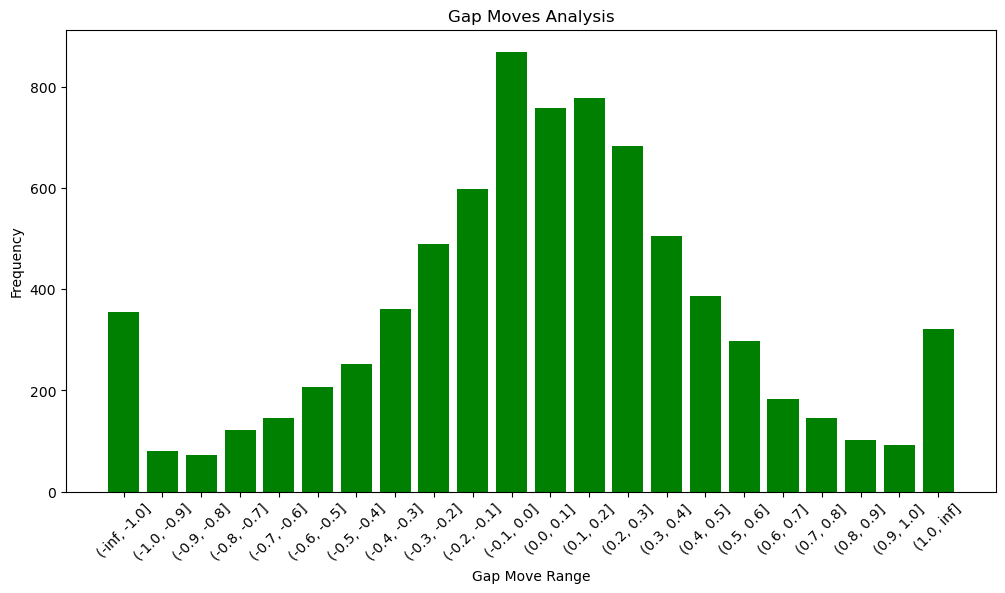

In [41]:


# Convert Gap_Move_Bin to strings for comparison
gap_moves_table['Gap_Move_Bin'] = gap_moves_table['Gap_Move_Bin'].astype(str)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(gap_moves_table['Gap_Move_Bin'], gap_moves_table['Frequency'], color=['red' if x[0] == '-' else 'green' for x in gap_moves_table['Gap_Move_Bin']])
plt.xlabel('Gap Move Range')
plt.ylabel('Frequency')
plt.title('Gap Moves Analysis')
plt.xticks(rotation=45)
plt.show()


In [42]:
# Calculate the percentage gap move
df['Percentage Gap Move'] = (df['Gap'] / df['Open']) * 100

# Define bin ranges for extreme moves
bins = [-float('inf'), -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')]

# Create a new column with bin labels for extreme moves
df['Extreme_Move_Bin'] = pd.cut(df['Percentage Gap Move'], bins=bins)

# Filter data for extreme moves (> 1% or < -1%)
extreme_moves_df = df[(df['Percentage Gap Move'] > 1) | (df['Percentage Gap Move'] < -1)]

# Create a table to analyze extreme moves
extreme_moves_table = extreme_moves_df.groupby('Extreme_Move_Bin').size().reset_index(name='Frequency')

# Display the table
print("Extreme Gap Moves:")
print(extreme_moves_table)


Extreme Gap Moves:
   Extreme_Move_Bin  Frequency
0     (-inf, -10.0]          1
1     (-10.0, -9.0]          1
2      (-9.0, -8.0]          2
3      (-8.0, -7.0]          2
4      (-7.0, -6.0]          0
5      (-6.0, -5.0]          1
6      (-5.0, -4.0]          2
7      (-4.0, -3.0]         12
8      (-3.0, -2.0]         58
9      (-2.0, -1.0]        275
10      (-1.0, 1.0]          0
11       (1.0, 2.0]        262
12       (2.0, 3.0]         44
13       (3.0, 4.0]         10
14       (4.0, 5.0]          2
15       (5.0, 6.0]          3
16       (6.0, 7.0]          0
17       (7.0, 8.0]          0
18       (8.0, 9.0]          0
19      (9.0, 10.0]          0
20      (10.0, inf]          0


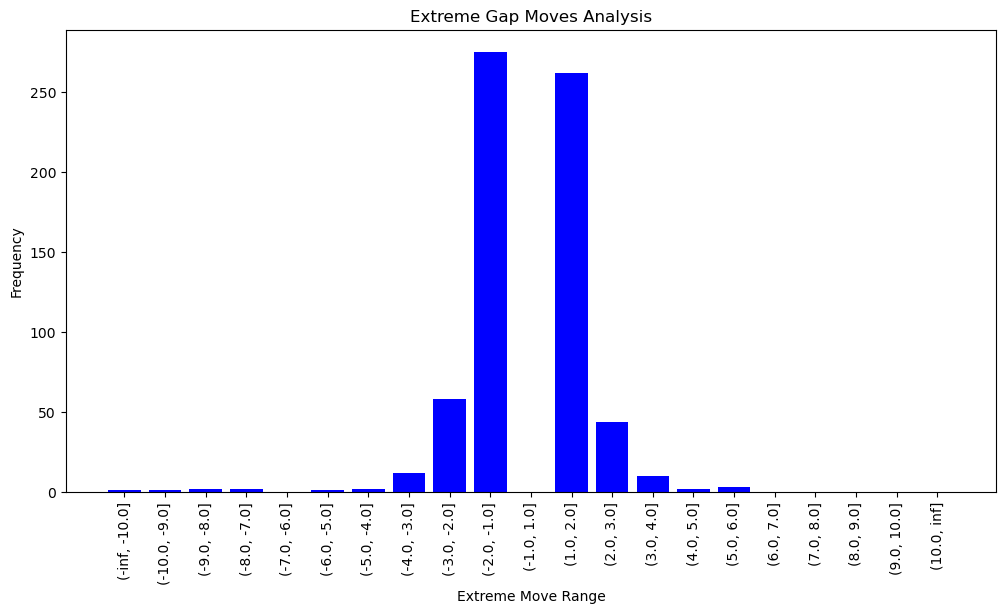

In [44]:
import matplotlib.pyplot as plt

# Create the bar chart for extreme moves
plt.figure(figsize=(12, 6))
plt.bar(extreme_moves_table['Extreme_Move_Bin'].astype(str), extreme_moves_table['Frequency'], color='blue')
plt.xlabel('Extreme Move Range')
plt.ylabel('Frequency')
plt.title('Extreme Gap Moves Analysis')
plt.xticks(rotation=90)
plt.show()


In [51]:
extreme_moves_df['Percentage Gap Move'].nlargest(10)

Date
2008-10-13    5.720680
2020-03-13    5.693867
2008-09-19    5.232831
2020-03-24    4.892928
2008-12-16    4.494991
2010-05-10    3.928845
2008-10-28    3.881383
2020-11-09    3.794268
2020-04-06    3.742629
2020-03-10    3.657252
Name: Percentage Gap Move, dtype: float64

In [52]:
extreme_moves_df['Percentage Gap Move'].nsmallest(10)

Date
2020-03-16   -11.667641
2008-10-24    -9.076856
2001-09-17    -8.960399
2020-03-09    -8.049402
2020-03-12    -7.171869
2020-03-18    -7.005292
2015-08-24    -5.514959
2001-09-21    -4.698770
2008-10-10    -4.541257
2020-04-01    -3.939836
Name: Percentage Gap Move, dtype: float64

In [56]:
# Define the stock symbol and date range
symbol = "^VIX"
start_date = "1900-01-01"
end_date = "2024-01-21"

# Fetch historical stock data
df_Vix = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [62]:
df_Vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [60]:
# Get the top N smallest values from 'Percentage Gap Move'
N = 10
smallest_moves = extreme_moves_df['Percentage Gap Move'].nsmallest(N)

# Get the dates corresponding to the smallest moves
dates_of_interest = smallest_moves.index

# Filter the VIX data for the specified dates
vix_open_close_data = df_Vix[df_Vix.index.isin(dates_of_interest)][['Open', 'Close']]

# Print the DataFrame with Open and Close values for the specified dates
print(vix_open_close_data)


                 Open      Close
Date                            
2001-09-17  43.200001  41.759998
2001-09-21  48.930000  42.660000
2008-10-10  65.849998  69.949997
2008-10-24  67.800003  79.129997
2015-08-24  28.030001  40.740002
2020-03-09  41.939999  54.459999
2020-03-12  61.459999  75.470001
2020-03-16  57.830002  82.690002
2020-03-18  69.370003  76.449997
2020-04-01  57.380001  57.060001


In [61]:
# Get the top N smallest values from 'Percentage Gap Move'
N = 10
largest_moves = extreme_moves_df['Percentage Gap Move'].nlargest(N)

# Get the dates corresponding to the smallest moves
dates_of_interest = largest_moves.index

# Filter the VIX data for the specified dates
vix_open_close_data = df_Vix[df_Vix.index.isin(dates_of_interest)][['Open', 'Close']]

# Print the DataFrame with Open and Close values for the specified dates
print(vix_open_close_data)


                 Open      Close
Date                            
2008-09-19  33.070000  32.070000
2008-10-13  69.949997  54.990002
2008-10-28  73.300003  66.959999
2008-12-16  56.759998  52.369999
2010-05-10  28.650000  28.840000
2020-03-10  49.680000  47.299999
2020-03-13  71.309998  57.830002
2020-03-24  58.759998  61.669998
2020-04-06  44.169998  45.240002
2020-11-09  24.799999  25.750000


In [66]:
df_Vix['Open'].describe()

count    8578.000000
mean       19.664857
std         7.981579
min         9.010000
25%        13.930000
50%        17.790001
75%        23.097500
max        82.690002
Name: Open, dtype: float64

In [68]:
df_Vix.index

DatetimeIndex(['1990-01-02', '1990-01-03', '1990-01-04', '1990-01-05',
               '1990-01-08', '1990-01-09', '1990-01-10', '1990-01-11',
               '1990-01-12', '1990-01-15',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=8578, freq=None)

In [70]:
df.index

DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=7799, freq=None)

In [72]:
df_Vix.index

DatetimeIndex(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03',
               '1993-02-04', '1993-02-05', '1993-02-08', '1993-02-09',
               '1993-02-10', '1993-02-11',
               ...
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19'],
              dtype='datetime64[ns]', name='Date', length=7799, freq=None)

In [ ]:

# Merge Spy and Vix dataframes based on the common date index
merged_df = pd.merge(Spy, Vix, left_index=True, right_index=True)

# The resulting merged_df will contain data from both Spy and Vix with matching dates
